<a href="https://colab.research.google.com/github/ibonetc/AI_Deep-Learning/blob/main/DL_EjemploFashionMNIST_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo tensorflow con MNIST

In [ ]:
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


2.12.0


## Base de datos MNIST

<table>
  <tr>
    <th>Label</th>    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>    <td>Ankle boot</td>
  </tr>
</table>

In [ ]:
class_names= ['Camiseta/top', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
               'Sandalia', 'Camisa', 'Tenis', 'Bolsa', 'Botín']

In [ ]:
fashion_mnist= keras.datasets.fashion_mnist
(train_images, train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


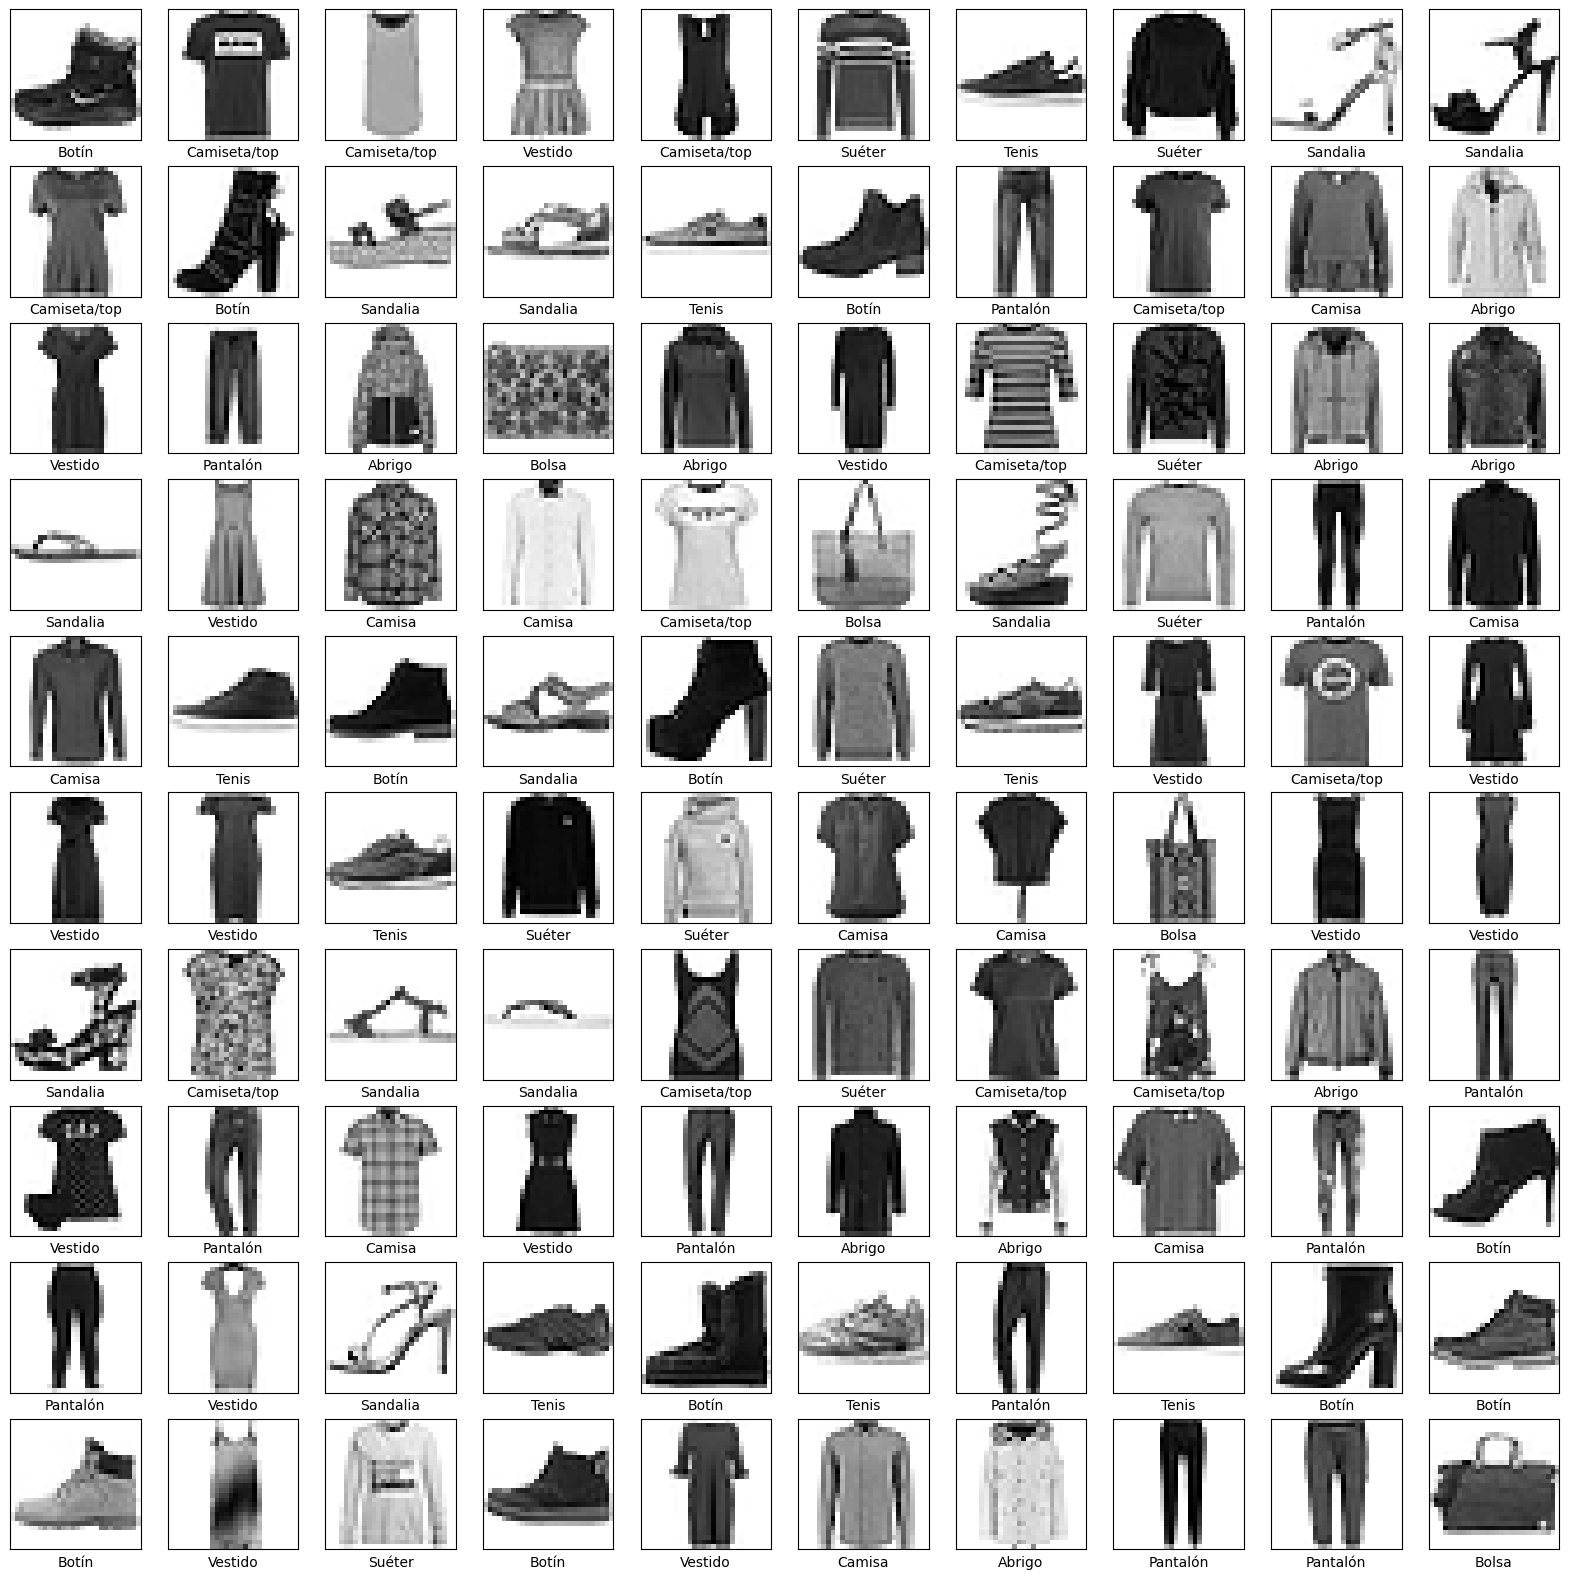

In [ ]:
plt.figure(figsize=(20,20))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()


In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

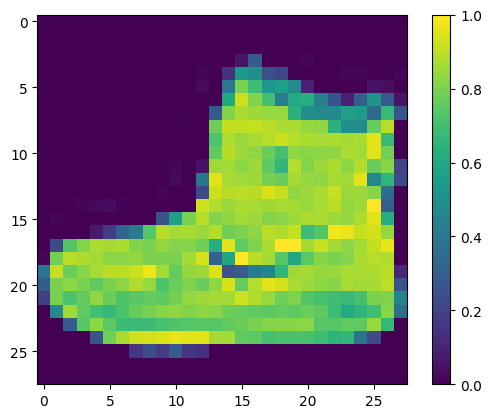

In [ ]:
plt.figure()
plt.imshow(train_images[0]/255)
plt.colorbar()
plt.show()

In [ ]:
train_imagesN=train_images/255
test_imagesN=test_images/255

## Modelo de red MLP con capas Dense

### Definición de la topología

In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Conv2D, Dropout, MaxPooling2D,AveragePooling2D
from tensorflow.keras import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Model, Input

In [ ]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(10,activation=tf.nn.softmax))

In [ ]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation=tf.nn.relu),
    Dense(10,activation=tf.nn.softmax)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


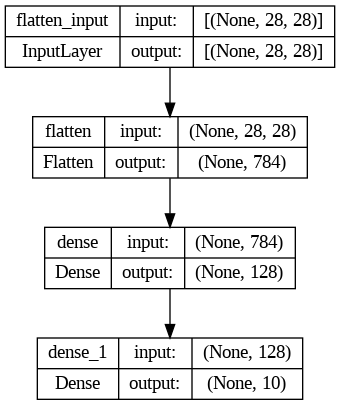

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
l_in= Input(shape=(28,28))
l_n=Flatten()(l_in)
l_n=Dense(128, activation=tf.nn.relu)(l_n)
output=Dense(10, activation=tf.nn.softmax)(l_n)
model=Model(inputs=l_in, outputs=output)

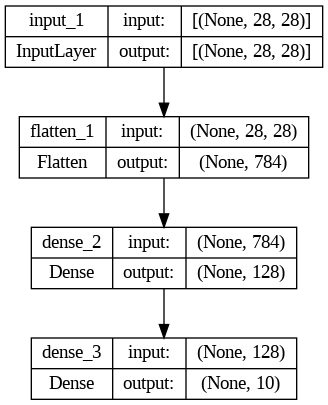

In [ ]:
plot_model(model, show_shapes=True)

### Definir el algoritmo de aprendizaje y las métricas

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['acc'])

### Entrenar el modelo

In [ ]:
model.fit()

In [ ]:
history=model.fit(train_imagesN, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 3ms/step - loss: 0.5047 - acc: 0.8240
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3829 - acc: 0.8622
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3428 - acc: 0.8745
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3169 - acc: 0.8824
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2972 - acc: 0.8904
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2833 - acc: 0.8945
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2711 - acc: 0.8991
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2599 - acc: 0.9030
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2507 - acc: 0.9060
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2411 - acc: 0.9102


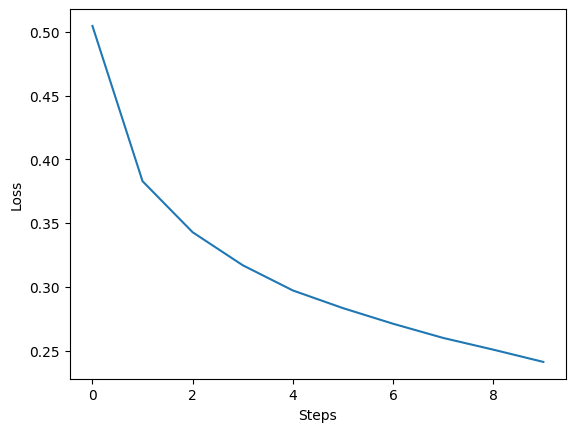

In [ ]:
plt.figure()
plt.ylabel('Loss')
plt.xlabel('Steps')
plt.plot(history.history['loss'])

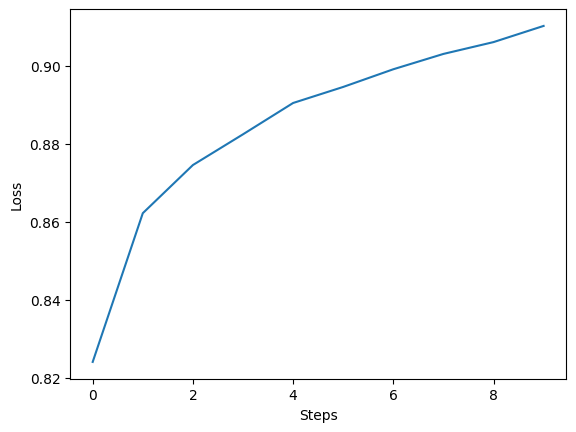

In [ ]:
plt.figure()
plt.ylabel('Loss')
plt.xlabel('Steps')
plt.plot(history.history['acc'])

In [ ]:
test_loss, test_acc=model.evaluate(test_imagesN,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3318 - acc: 0.8821


In [ ]:
predictions=model.predict(test_imagesN)

313/313 [==============================] - 1s 2ms/step


In [ ]:
class_names

['Camiseta/top',
 'Pantalón',
 'Suéter',
 'Vestido',
 'Abrigo',
 'Sandalia',
 'Camisa',
 'Tenis',
 'Bolsa',
 'Botín']

In [ ]:
predictions[0]

array([1.2131704e-07, 5.9007493e-11, 1.6318646e-10, 7.1001677e-12,
       2.0016347e-10, 3.9099916e-04, 1.3095389e-07, 4.4003208e-03,
       9.2421558e-08, 9.9520832e-01], dtype=float32)

In [ ]:
np.max(predictions[0])*100

99.52083230018616

In [ ]:
class_names[np.argmax(predictions[0])]

'Botín'

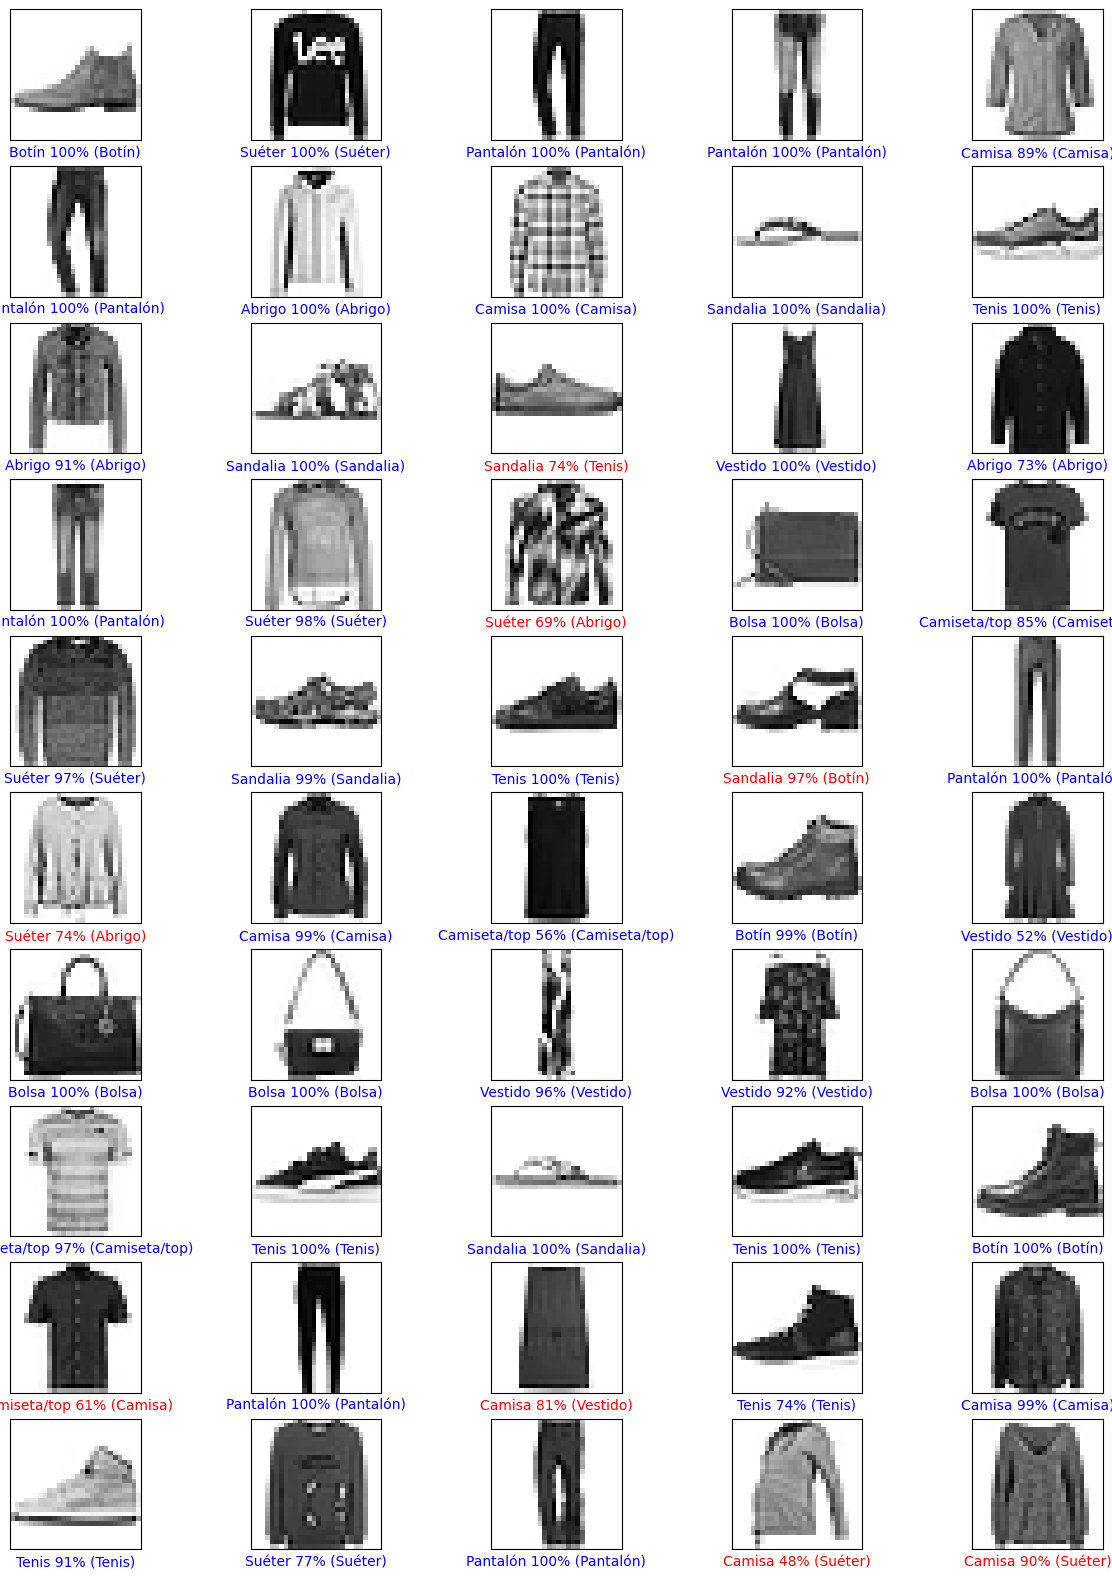

In [ ]:
plt.figure(figsize=(15,20))
for i in range(50):
  plt.subplot(10,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(test_imagesN[i], cmap=plt.cm.binary)
  predict_label=np.argmax(predictions[i])
  color= 'blue' if predict_label== test_labels[i] else 'red'
  plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predict_label],
             100*np.max(predictions[i]),
             class_names[test_labels[i]]
                                       ),
             color=color)
plt.show()

### Predecir una sola imagen

In [ ]:
test_imagesN.shape

(10000, 28, 28)

In [ ]:
img=test_imagesN[0]
img.shape

(28, 28)

In [ ]:
img=(np.expand_dims(img,0))
img.shape

(1, 28, 28)

In [ ]:
model.predict(img)

1/1 [==============================] - 0s 23ms/step


array([[1.2131716e-07, 5.9007715e-11, 1.6318677e-10, 7.1001677e-12,
        2.0016347e-10, 3.9099899e-04, 1.3095377e-07, 4.4003185e-03,
        9.2421558e-08, 9.9520832e-01]], dtype=float32)

In [ ]:
class_names[np.argmax(model.predict(img))]

1/1 [==============================] - 0s 17ms/step


'Botín'

### Guardar el modelo

In [ ]:
model.save('modelMNIST.h5')

### Volver a cargar el modelo

In [ ]:
new_model= tf.keras.models.load_model('modelMNIST.h5')

In [ ]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.evaluate(train_imagesN, train_labels)
new_model.evaluate(train_imagesN, train_labels)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.2224 - acc: 0.9180


[0.2223573923110962, 0.9180333614349365]

In [ ]:
model.evaluate(test_imagesN, test_labels)
new_model.evaluate(test_imagesN, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3318 - acc: 0.8821


[0.3318091928958893, 0.882099986076355]

## Modelo Convolucional

In [ ]:
train_imagesN.shape

(60000, 28, 28)

In [ ]:
x_train=train_imagesN.reshape(train_imagesN.shape[0],train_imagesN.shape[1],train_imagesN.shape[2],1)
x_test=test_imagesN.reshape(test_imagesN.shape[0],test_imagesN.shape[1],test_imagesN.shape[2],1)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
x_train.shape[1:4]

(28, 28, 1)

In [ ]:
modelC=Sequential()
modelC.add(Conv2D(32,kernel_size=(3,3),input_shape=(x_train.shape[1:4])))
modelC.add(Conv2D(32,kernel_size=(3,3)))
modelC.add(MaxPooling2D(pool_size=(2,2)))
modelC.add(Flatten())
modelC.add(Dense(128, activation=tf.nn.relu))
modelC.add(Dropout(0.2))
modelC.add(Dense(10, activation=tf.nn.softmax))

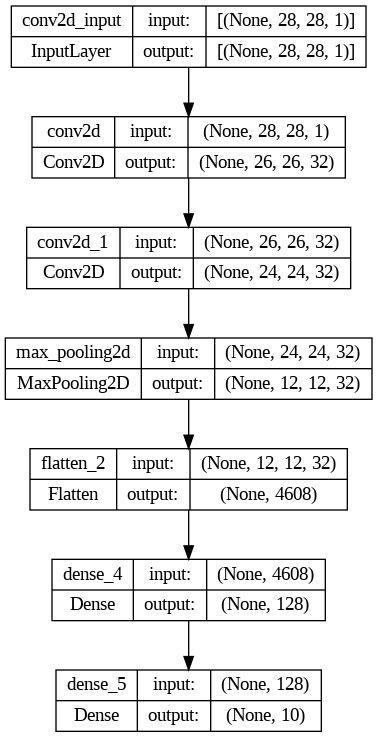

In [ ]:
plot_model(modelC, show_shapes=True)

In [ ]:
from keras.engine.training import optimizer
modelC.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc', 'mse'])

In [ ]:
history=modelC.fit(x_train, train_labels, epochs=20, validation_data=(x_test, test_labels))

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4068 - acc: 0.8548 - mse: 27.6792 - val_loss: 0.3029 - val_acc: 0.8884 - val_mse: 27.6847
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2775 - acc: 0.8988 - mse: 27.6856 - val_loss: 0.2706 - val_acc: 0.8981 - val_mse: 27.6855
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2343 - acc: 0.9137 - mse: 27.6878 - val_loss: 0.2681 - val_acc: 0.9052 - val_mse: 27.6880
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2018 - acc: 0.9260 - mse: 27.6894 - val_loss: 0.2633 - val_acc: 0.9050 - val_mse: 27.6894
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1814 - acc: 0.9328 - mse: 27.6904 - val_loss: 0.2940 - val_acc: 0.9052 - val_mse: 27.6908
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1622 - acc: 0.9396 - mse: 27.6915 - val_loss: 0.2818 - val_acc: 0.9075 - val_mse:

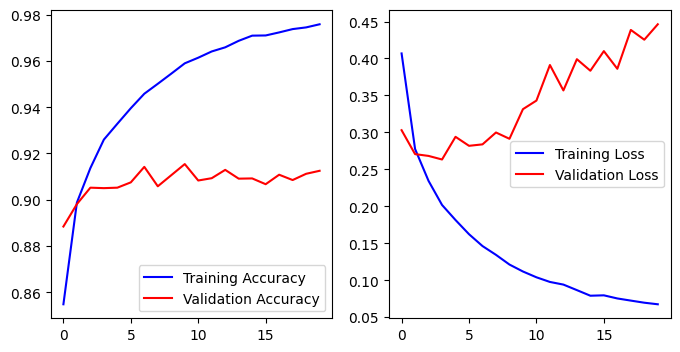

In [ ]:
acc=history.history['acc']
val_acc=history.history['val_acc']
epoch=range(len(acc))
loss=history.history['loss']
val_loss=history.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'red',label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Training Loss')
ax[1].plot(epoch,val_loss,'red',label='Validation Loss')
ax[1].legend()
plt.show()